# Lab 1 Analysis Example using Thicket

In [476]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [477]:
tk = th.Thicket.from_caliperreader(glob("cali_files/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)

In [478]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              511445003        0.811827   
                                                  1610153646       0.015142   
                                                  1996847107       0.030080   
                                                  2564783104       0.903259   
                                                  2581957382       0.308800   
                                                  2972243436       0.025319   
                                                  3067335039       0.243482   
                                                  3932391281       0.150726   
                                                  4010086893       0.002364   
{'name': 'comm', 'type': 'function'}              511445003        0.178598   
                                                  1610153646       0.000722   
                                                  1996847107       0.009438   
                                                  2564783104       0.258338   
                                                  2581957382       0.071222   
                                                  2972243436       0.004777   
                                                  3067335039       0.132948   
                                                  3932391281       0.058192   
                                                  4010086893       0.000233   
{'name': 'comm_large', 'type': 'function'}        511445003             NaN   
                                                  1610153646            NaN   
                                                  1996847107            NaN   
                                                  2564783104            NaN   
                                                  2581957382            NaN   
                                                  2972243436            NaN   
                                                  3067335039       0.132558   
                                                  3932391281       0.057730   
                                                  4010086893            NaN   
{'name': 'MPI_Recv', 'type': 'function'}          511445003             NaN   
                                                  1610153646            NaN   
                                                  1996847107            NaN   
                                                  2564783104            NaN   
                                                  2581957382            NaN   
                                                  2972243436            NaN   
                                                  3067335039       0.132195   
                                                  3932391281       0.057356   
                                                  4010086893            NaN   
{'name': 'MPI_Send', 'type': 'function'}          511445003             NaN   
                                                  1610153646            NaN   
                                                  1996847107            NaN   
                                                  2564783104            NaN   
                                                  2581957382            NaN   
                                                  2972243436            NaN   
                                                  3067335039       0.000085   
                                                  3932391281       0.000082   
                                                  4010086893            NaN   
{'name': 'comm_small', 'type': 'function'}        511445003        0.178477   
                                                  1610153646       0.000706   
                                                  1996847107       0.009391   
                                                  2564783104       0.258154   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [479]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     ├─ 1.000 MPI_Gather
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [480]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
511445003,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,1024-16.cali,true,1700021003,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 1024]",c,Bubble Sort(Odd/Even),MPI,int,4,1024,1 perturbed,16,0,14,Handwritten
1610153646,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,2048-2.cali,true,1700024244,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 2048]",c,Bubble Sort(Odd/Even),MPI,int,4,2048,1 perturbed,2,0,14,Handwritten
1996847107,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,1024-4.cali,true,1700020990,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 1024]",c,Bubble Sort(Odd/Even),MPI,int,4,1024,1 perturbed,4,0,14,Handwritten
2564783104,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,2048-16.cali,true,1700024240,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 2048]",c,Bubble Sort(Odd/Even),MPI,int,4,2048,1 perturbed,16,0,14,Handwritten
2581957382,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,2048-8.cali,true,1700024240,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 2048]",c,Bubble Sort(Odd/Even),MPI,int,4,2048,1 perturbed,8,0,14,Handwritten
2972243436,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,2048-4.cali,true,1700024240,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 2048]",c,Bubble Sort(Odd/Even),MPI,int,4,2048,1 perturbed,4,0,14,Handwritten
3067335039,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,true,1024-16.cali,NaN,1700018819,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_sort, 1024]",c,Sample Sort,MPI,int,4,1024,1 perturbed,16,0,14,Handwritten
3932391281,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,true,2048-16.cali,NaN,1700026207,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_sort, 2048]",c,Sample Sort,MPI,int,4,2048,1 perturbed,16,0,14,Handwritten
4010086893,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,1024-2.cali,true,1700019884,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 1024]",c,Bubble Sort(Odd/Even),MPI,int,4,1024,1 perturbed,2,0,14,Handwritten


In [481]:
gb = tk.groupby("InputSize")
allthickets = list(gb.values())
input65536 = allthickets[0].groupby("Algorithm")
input262144 = allthickets[1].groupby("Algorithm")
#input1048576 =
#input4194304 =
#input16777216 =
#input67108864 =
#input268435456 =


2  thickets created...
{1024: <thicket.thicket.Thicket object at 0x2ad3bf00bc10>, 2048: <thicket.thicket.Thicket object at 0x2ad3bf007b80>}
2  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2ad3bfb83dc0>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2ad3bfc50c10>}
2  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2ad3bfc4e1f0>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2ad3bfc50a00>}


Compose these 3 groups column-wise to get a holistic view of the data

In [482]:
ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_procs"
)


allctk = []
allctk.append(ctk65536)
allctk.append(ctk262144)

In [483]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.002364   
                                                  4                      0.030080   
                                                  16                     0.811827   
{'name': 'comm', 'type': 'function'}              2                      0.000233   
                                                  4                      0.009438   
                                                  16                     0.178598   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  16                          NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  16                          NaN   
{'name': 'MPI_Send', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  16                          NaN   
{'name': 'comm_small', 'type': 'function'}        2                      0.000217   
                                                  4                      0.009391   
                                                  16                     0.178477   
{'name': 'MPI_Bcast', 'type': 'function'}         2                           NaN   
                                                  4                           NaN   
                                                  16                          NaN   
{'name': 'MPI_Gather', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  16                          NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                      0.000172   
                                                  4                      0.008213   
                                                  16                     0.119200   
{'name': 'MPI_Send', 'type': 'function'}          2                      0.000025   
                                                  4                      0.000032   
                                                  16                     0.000058   
{'name': 'comp', 'type': 'function'}              2                      0.000085   
                                                  4                      0.000136   
                                                  16                     0.000201   
{'name': 'comp_large', 'type': 'function'}        2                      0.000018   
                                                  4                      0.000062   
                                                  16                     0.000075   
{'name': 'comp_small', 'type': 'function'}        2                      0.000039   
                                                  4                      0.000024   
                                                  16                     0.000069   
{'name': 'correctness_check', 'type': 'function'} 2                      0.000019   
                                                  4                      0.000026   
                                                  16                     0.000029   
{'name': 'data_init', 'type': 'function'}         2                      0.000023   
                                                  4                      0.000016   
                                                  16             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.015142   
                                                  4                      0.025319   
                                                  8                      0.308800   
                                                  16                     0.903259   
{'name': 'comm', 'type': 'function'}              2                      0.000722   
                                                  4                      0.004777   
                                                  8                      0.071222   
                                                  16                     0.258338   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
{'name': 'MPI_Send', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
{'name': 'comm_small', 'type': 'function'}        2                      0.000706   
                                                  4                      0.004148   
                                                  8                      0.071153   
                                                  16                     0.258154   
{'name': 'MPI_Bcast', 'type': 'function'}         2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
{'name': 'MPI_Gather', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                      0.000659   
                                                  4                      0.001408   
                                                  8                      0.021226   
                                                  16                     0.177700   
{'name': 'MPI_Send', 'type': 'function'}          2                      0.000025   
                                                  4                      0.000028   
                                                  8                      0.000046   
                                                  16                     0.000067   
{'name': 'comp', 'type': 'function'}              2                      0.002606   
                                                  4                      0.000426   
                                                  8                      0.000110   
                                                  16                     0.000225   
{'name': 'comp_large', 'type': 'function'}        2              

Perform pandas operations to get the table in a desirable format for plotting

In [484]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [485]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      0.002364      0.003123      0.002744   
                  4                      0.030080      0.030794      0.030404   
                  16                     0.811827      0.870173      0.832973   
comm              2                      0.000233      0.000931      0.000582   
                  4                      0.009438      0.009684      0.009523   
                  16                     0.178598      0.319848      0.259477   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
MPI_Send          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
comm_small        2                      0.000217      0.000923      0.000570   
                  4                      0.009391      0.009668      0.009488   
                  16                     0.178477      0.319666      0.259300   
MPI_Bcast         2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
MPI_Gather        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
MPI_Recv          2                      0.000172      0.000857      0.000515   
                  4                      0.008213      0.009592      0.009131   
                  16                     0.119200      0.319293      0.231613   
MPI_Send          2                      0.000025      0.000047      0.000036   
                  4                      0.000032      0.000052      0.000043   
                  16                     0.000058      0.000105      0.000084   
comp              2                      0.000085      0.000166      0.000125   
                  4                      0.000136      0.000627      0.000425   
                  16                     0.000201      0.000479      0.000389   
comp_large        2                      0.000018      0.000018      0.000018   
                  4                      0.000062      0.000552      0.000389   
                  16                     0.000075      0.000217      0.000136   
comp_small        2                      0.000039      0.000146      0.000093   
                  4                      0.000024      0.000279      0.000088   
                  16                     0.000069      0.000088      0.000076   
correctness_check 2                      0.000019      0.000020      0.000019   
                  4                      0.000026      0.000449      0.000133   
                  16                     0.000029      0.039995      0.012446   
data_init         2                      0.000023      0.000025      0.000024   
                  4                      0.000016      0.000018      0.000017   
                  16                     0.000012      0.000032      0.000014   

                                                 Sample Sort                \
                            Variance time/rank Min time/rank 

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      0.015142      0.015156      0.015149   
                  4                      0.025319      0.027954      0.026136   
                  8                      0.308800      0.329164      0.318580   
                  16                     0.903259      0.939237      0.922644   
comm              2                      0.000722      0.008889      0.004806   
                  4                      0.004777      0.007835      0.006528   
                  8                      0.071222      0.110366      0.089153   
                  16                     0.258338      0.325080      0.287102   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
MPI_Send          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
comm_small        2                      0.000706      0.008880      0.004793   
                  4                      0.004148      0.007818      0.005698   
                  8                      0.071153      0.110264      0.089067   
                  16                     0.258154      0.324901      0.286917   
MPI_Bcast         2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
MPI_Gather        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
MPI_Recv          2                      0.000659      0.008808      0.004734   
                  4                      0.001408      0.007734      0.004950   
                  8                      0.021226      0.110036      0.077920   
                  16                     0.177700      0.324532      0.264854   
MPI_Send          2                      0.000025      0.000049      0.000037   
                  4                      0.000028      0.000053      0.000041   
                  8                      0.000046      0.000074      0.000058   
                  16                     0.000067      0.000113      0.000085   
comp              2                      0.002606      0.010751      0.006678   
                  4                      0.000426      0.003093      0.001903   
                  8                      0.000110      0.001436      0.000777   
                  16                     0.000225      0.000920      0.000675   
comp_large        2                      0.008340      0.008340      0.008340   
                  4                      0.001284      0.002141      0.001854   
                  8                      0.000031      0.00

In [486]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_procs"))))

In [487]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())


# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [488]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [489]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [490]:
temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank') ]

print(temp[0])
print(ctk.dataframe.columns)

('Bubble Sort(Odd/Even)', 'Avg time/rank')
MultiIndex([('Bubble Sort(Odd/Even)', 'Avg time/rank'),
            (          'Sample Sort', 'Avg time/rank')],
           )


In [491]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

['MPI_Bcast', 'MPI_Gather', 'MPI_Recv', 'MPI_Send', 'comm', 'comm_large', 'comm_small', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main']


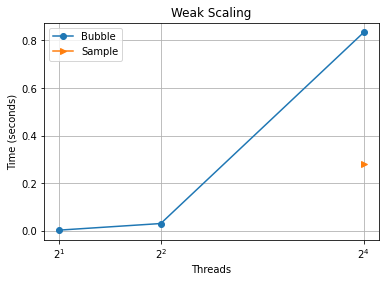

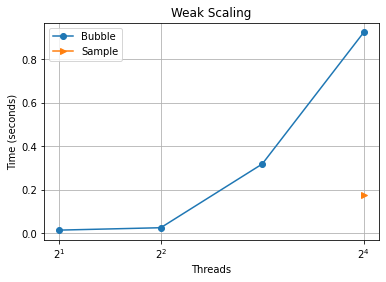

In [493]:
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        title="Weak Scaling",
        xlabel="Threads",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample'
    )

## Speedup